\## Recommender Systems

# LSTM-Based Recommender Using SLi-Rec:
Expected Runtime:

For ml-100k (100,000 interactions) and with the configurations (10 epochs, batch size of 128):


*   On a GPU (e.g., NVIDIA Tesla T4): It may take about 3–8 minutes.
*   On a CPU (e.g., 8-core): It could range from 10–20 minutes
*   GPU (Google Colab) T4 GPU: ~2–5 minutes
*   GPU (Google Colab) L4 GPU: ~1.5–4 minutes
*   GPU (Google Colab) A100 GPU: ~1–2 minutes






**Model 1: Using BPR**

Source: https://grouplens.org/datasets/movielens/100k/


This data set consists of:

*   100,000 ratings (1-5) from 943 users on 1682 movies.
*   Each user has rated at least 20 movies.
*  Simple demographic info for the users (age, gender, occupation, zip)

In [ ]:
from recbole.config import Config
from recbole.data.utils import create_dataset
from recbole.utils import init_seed, init_logger

import warnings
warnings.filterwarnings('ignore')

# Define the configuration dictionary
config_dict = {
    'model': 'BPR',  # You can replace this with other models like NCF, SASRec, etc.
    'dataset': 'ml-100k',  # Specify the dataset you want to use ('ml-100k' for MovieLens 100K)
    'data_path': 'dataset/',  # You can set your custom path or leave it as default
    'log_level': 'none'  # Set log level to 'none' to disable logging
}

# Initialize the configuration object
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict)

# Initialize the random seed and logger
init_seed(42, True)  # The second argument 'True' ensures reproducibility
init_logger(config)  # Pass the config object to the init_logger function

# RecBole will automatically download the dataset if not present
dataset = create_dataset(config)

# Display the first 50 interactions from the dataset
sample_data = dataset.inter_feat.head(10)
display(sample_data)


/usr/local/lib/python3.10/dist-packages/recbole/data/dataset/dataset.py:648: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  feat[field].fillna(value=0, inplace=True)
/usr/local/lib/python3.10/dist-packages/recbole/data/dataset/dataset.py:650: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

,user_id,item_id,rating,timestamp
0,1,1,0.50,0.351593
1,2,2,0.50,0.915478
2,3,3,0.00,0.224244
3,4,4,0.25,0.316897
4,5,5,0.00,0.628862
5,6,6,0.75,0.509543
6,7,7,0.25,0.347312
7,8,8,1.00,0.910668
8,9,9,0.50,0.624941
9,10,10,0.50,0.478307


In [ ]:
print("Counts:")
dataset.inter_feat.count()

Counts:


,0
user_id,100000
item_id,100000
rating,100000
timestamp,100000


In [ ]:
# summary of user-item interactions
print(f"Total interactions: {len(dataset.inter_feat)}")
print(f"Total unique users: {dataset.inter_feat['user_id'].nunique()}")
print(f"Total unique items: {dataset.inter_feat['item_id'].nunique()}")
print(f"Missing values:\n{dataset.inter_feat.isnull().sum()}")
print(f"Summary statistics:\n{dataset.inter_feat.describe()}")

Total interactions: 100000
Total unique users: 943
Total unique items: 1682
Missing values:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64
Summary statistics:
            user_id        item_id         rating      timestamp
count  100000.00000  100000.000000  100000.000000  100000.000000
mean      441.38882     428.428460       0.632465       0.474312
std       284.93971     334.690012       0.281418       0.287893
min         1.00000       1.000000       0.000000       0.000000
25%       162.00000     157.000000       0.500000       0.254499
50%       443.00000     352.500000       0.750000       0.436497
75%       677.00000     631.000000       0.750000       0.729195
max       943.00000    1682.000000       1.000000       1.000000


In [ ]:
from recbole.config import Config
from recbole.data.utils import create_dataset
from recbole.utils import init_seed, init_logger
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Define the configuration dictionary
config_dict = {
    'model': 'BPR',  # You can replace this with other models like NCF, SASRec, etc.
    'dataset': 'ml-100k',  # Specify the dataset you want to use ('ml-100k' for MovieLens 100K)
    'data_path': 'dataset/',  # You can set your custom path or leave it as default
    'log_level': 'none',  # Set log level to 'none' to disable logging
    'load_col': {
        'inter': ['user_id', 'item_id', 'rating', 'timestamp'],  # Load interaction columns
        'item': ['item_id', 'movie_id', 'movie_title'],  # Load item columns (add more if available)
        'user': ['user_id']   # Load user columns (add more if available)
    }
}

# Initialize the configuration object
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict)

# Initialize the random seed and logger
init_seed(42, True)  # The second argument 'True' ensures reproducibility
init_logger(config)  # Pass the config object to the init_logger function

# RecBole will automatically download the dataset if not present
dataset = create_dataset(config)

# Get interaction, item, and user features
inter_feat = dataset.inter_feat
item_feat = dataset.item_feat
user_feat = dataset.user_feat

# Check if item and user features are available
if item_feat is not None and user_feat is not None:
    # Merge interaction data with item and user features
    merged_data = pd.merge(inter_feat, item_feat, on='item_id', how='left')
    merged_data = pd.merge(merged_data, user_feat, on='user_id', how='left')

    # Display the first 10 rows of the combined dataset
    display(merged_data.head(10))
else:
    print("Item or user features not available.")


/usr/local/lib/python3.10/dist-packages/recbole/data/dataset/dataset.py:501: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[field].fillna(value="", inplace=True)
/usr/local/lib/python3.10/dist-packages/recbole/data/dataset/dataset.py:1217: FutureWarning: using <built-in function len> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  split_point = np.cumsum(feat[field].agg(len))[:-1]
/usr/local/lib/python3.10/dist-packages/recbole/data/dataset/dataset.py:648: FutureWarn

,user_id,item_id,rating,timestamp,movie_title
0,1,1,0.50,0.351593,[532]
1,2,2,0.50,0.915478,"[636, 637]"
2,3,3,0.00,0.224244,[762]
3,4,4,0.25,0.316897,"[116, 117, 60, 118]"
4,5,5,0.00,0.628862,"[720, 642]"
5,6,6,0.75,0.509543,"[936, 937, 938, 700, 202, 939, 213, 940, 941, ..."
6,7,7,0.25,0.347312,"[578, 95, 134, 579, 29]"
7,8,8,1.00,0.910668,"[569, 557, 29]"
8,9,9,0.50,0.624941,[897]
9,10,10,0.50,0.478307,"[192, 117, 60, 193, 29]"


In [ ]:
import time  # To track start, end, and total run time
from recbole.config import Config
from recbole.data.utils import create_dataset, data_preparation
from recbole.model.general_recommender import BPR
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger
import os

import warnings
warnings.filterwarnings('ignore')

# Step 1: Define the configuration dictionary
config_dict = {
    'model': 'BPR',  # The model to train (you can replace with other models like NCF, SASRec, etc.)
    'dataset': 'ml-100k',  # Dataset to use (MovieLens 100K)
    'data_path': 'dataset/',  # Default data path
    'epochs': 10,  # Number of training epochs
    'train_batch_size': 512,  # Batch size during training
    'eval_batch_size': 512,  # Batch size during evaluation
    'train_neg_sample_args': {'uniform': 1},  # Updated parameter for negative sampling
    'learning_rate': 0.001,  # Learning rate
    'topk': [5, 10],  # Evaluate top-k results (e.g., Precision@5, Precision@10)
    'metrics': ['Recall', 'Precision', 'NDCG'],  # Metrics to evaluate
    'valid_metric': 'Recall@10',  # Validation metric to select the best model
    'log_level': 'none',  # Disable logging for simplicity
    'checkpoint_dir': './saved_models/'  # Directory to save the best model
}

# Capture the start time
start_time = time.time()

# Step 2: Initialize the configuration object
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict)

# Step 3: Initialize the seed for reproducibility and logger
init_seed(42, True)
init_logger(config)

# Step 4: Load the dataset and prepare data for training
dataset = create_dataset(config)  # Automatically download the dataset if not available
train_data, valid_data, test_data = data_preparation(config, dataset)  # Split the data into train/valid/test

# Step 5: Initialize the model (BPR in this case)
model = BPR(config, train_data.dataset).to(config['device'])  # Load the BPR model

# Step 6: Initialize the trainer and start training
trainer = Trainer(config, model)  # Trainer handles the training loop
best_valid_score, best_valid_result = trainer.fit(train_data, valid_data)  # Train the model and validate

# Step 7: Manually load the best model
# Define the path to the saved model checkpoint (based on checkpoint_dir in config)
best_model_path = os.path.join(config['checkpoint_dir'], config['model'] + '.pth')

# Check if the best model exists
if os.path.exists(best_model_path):
    model.load_state_dict(trainer.load_checkpoint(best_model_path))  # Load the best model
else:
    print("Best model not found, proceeding with the current model.")

# Step 8: Evaluate the model using the Trainer's built-in test evaluation
test_result = trainer.evaluate(test_data)  # Let the Trainer evaluate the model

# Capture the end time
end_time = time.time()

# Step 9: Print the results
print("Best validation score:", best_valid_score)
print("Validation results:", best_valid_result)
print("Test results:", test_result)
print("Interpretation: The model was able to retrieve recall@10 of the relevant items in its top 10 recommendations for each user in the validation set.")

print("")
print("")

# Calculate and print total run time
total_time = end_time - start_time
display(f"Start time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
display(f"End time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
display(f"Total run time in A100 GPU: {total_time:.2f} seconds")


Best model not found, proceeding with the current model.
Best validation score: 0.1867
Validation results: OrderedDict([('recall@5', 0.1175), ('recall@10', 0.1867), ('precision@5', 0.1741), ('precision@10', 0.1445), ('ndcg@5', 0.2028), ('ndcg@10', 0.2087)])
Test results: OrderedDict([('recall@5', 0.1264), ('recall@10', 0.199), ('precision@5', 0.1968), ('precision@10', 0.1582), ('ndcg@5', 0.235), ('ndcg@10', 0.2337)])
Interpretation: The model was able to retrieve recall@10 of the relevant items in its top 10 recommendations for each user in the validation set.


'Start time: 2024-11-04 02:02:09'

'End time: 2024-11-04 02:02:30'

'Total run time: 21.61 seconds'

In [ ]:
import time  # To track start, end, and total run time
from recbole.config import Config
from recbole.data.utils import create_dataset, data_preparation
from recbole.model.general_recommender import BPR
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger
import os
import matplotlib.pyplot as plt  # For plotting metrics

import warnings
warnings.filterwarnings('ignore')

# Step 1: Define the configuration dictionary
config_dict = {
    'model': 'BPR',  # The model to train (you can replace with other models like NCF, SASRec, etc.)
    'dataset': 'ml-100k',  # Dataset to use (MovieLens 100K)
    'data_path': 'dataset/',  # Default data path
    'epochs': 10,  # Number of training epochs
    'train_batch_size': 512,  # Batch size during training
    'eval_batch_size': 512,  # Batch size during evaluation
    'train_neg_sample_args': {'uniform': 1},  # Updated parameter for negative sampling
    'learning_rate': 0.001,  # Learning rate
    'topk': [5, 10],  # Evaluate top-k results (e.g., Precision@5, Precision@10)
    'metrics': ['Recall', 'Precision', 'NDCG'],  # Metrics to evaluate
    'valid_metric': 'Recall@10',  # Validation metric to select the best model
    'log_level': 'none',  # Disable logging for simplicity
    'checkpoint_dir': './saved_models/'  # Directory to save the best model
}

start_time = time.time()

# Step 2: Initialize the configuration object
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict)

# Step 3: Initialize the seed for reproducibility and logger
init_seed(42, True)
init_logger(config)

# Step 4: Load the dataset and prepare data for training
dataset = create_dataset(config)  # Automatically download the dataset if not available
train_data, valid_data, test_data = data_preparation(config, dataset)  # Split the data into train/valid/test

# Step 5: Initialize the model (BPR in this case)
model = BPR(config, train_data.dataset).to(config['device'])  # Load the BPR model

# Step 6: Initialize the trainer and collect metrics after each epoch
trainer = Trainer(config, model)  # Trainer handles the training loop

epochs = []
recall_at_10 = []
precision_at_10 = []
ndcg_at_10 = []

# Use the fit method for training
for epoch in range(config['epochs']):
    print(f"Epoch {epoch + 1} / {config['epochs']}")

    # Fit the model for one epoch
    best_valid_score, valid_result = trainer.fit(train_data, valid_data)

    # Print valid_result keys for debugging purposes
    print(f"Validation results for epoch {epoch + 1}: {valid_result.keys()}")

    # Store the metrics for this epoch based on valid_result keys
    if 'Recall@10' in valid_result:
        recall_at_10.append(valid_result['Recall@10'])
    else:
        print(f"Recall@10 not found in validation results for epoch {epoch + 1}")

    if 'Precision@10' in valid_result:
        precision_at_10.append(valid_result['Precision@10'])
    else:
        print(f"Precision@10 not found in validation results for epoch {epoch + 1}")

    if 'NDCG@10' in valid_result:
        ndcg_at_10.append(valid_result['NDCG@10'])
    else:
        print(f"NDCG@10 not found in validation results for epoch {epoch + 1}")

    print(f"Epoch {epoch + 1}: Recall@10={recall_at_10[-1] if recall_at_10 else 'N/A'}, Precision@10={precision_at_10[-1] if precision_at_10 else 'N/A'}, NDCG@10={ndcg_at_10[-1] if ndcg_at_10 else 'N/A'}")

# Step 7: Manually load the best model
# Define the path to the saved model checkpoint (based on checkpoint_dir in config)
best_model_path = os.path.join(config['checkpoint_dir'], config['model'] + '.pth')

# Check if the best model exists
if os.path.exists(best_model_path):
    model.load_state_dict(trainer.load_checkpoint(best_model_path))  # Load the best model
else:
    print("Best model not found, proceeding with the current model.")

# Step 8: Evaluate the model using the Trainer's built-in test evaluation
test_result = trainer.evaluate(test_data)  # Let the Trainer evaluate the model

# Capture the end time
end_time = time.time()

# Step 9: Print the results
print("Test results:", test_result)
print("Interpretation: The model was able to retrieve recall@10 of the relevant items in its top 10 recommendations for each user in the test set.")

# Calculate and print total run time
total_time = end_time - start_time
print(f"Start time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
print(f"End time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
print(f"Total run time in A100 GPU: {total_time:.2f} seconds")

# Step 10: Plot the metrics (if available)
if recall_at_10 and precision_at_10 and ndcg_at_10:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, recall_at_10, label='Recall@10')
    plt.plot(epochs, precision_at_10, label='Precision@10')
    plt.plot(epochs, ndcg_at_10, label='NDCG@10')
    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.title('Epoch-wise Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Metrics not available for plotting.")


Epoch 1 / 10
Validation results for epoch 1: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Recall@10 not found in validation results for epoch 1
Precision@10 not found in validation results for epoch 1
NDCG@10 not found in validation results for epoch 1
Epoch 1: Recall@10=N/A, Precision@10=N/A, NDCG@10=N/A
Epoch 2 / 10
Validation results for epoch 2: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Recall@10 not found in validation results for epoch 2
Precision@10 not found in validation results for epoch 2
NDCG@10 not found in validation results for epoch 2
Epoch 2: Recall@10=N/A, Precision@10=N/A, NDCG@10=N/A
Epoch 3 / 10
Validation results for epoch 3: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Recall@10 not found in validation results for epoch 3
Precision@10 not found in validation results for epoch 3
NDCG@10 not found in validation results for epoch 

In [ ]:
import time  # To track start, end, and total run time
from recbole.config import Config
from recbole.data.utils import create_dataset, data_preparation
from recbole.model.general_recommender import BPR
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger
import os
import matplotlib.pyplot as plt  # For plotting metrics

import warnings
warnings.filterwarnings('ignore')

# Step 1: Define the configuration dictionary
config_dict = {
    'model': 'BPR',  # The model to train (you can replace with other models like NCF, SASRec, etc.)
    'dataset': 'ml-100k',  # Dataset to use (MovieLens 100K)
    'data_path': 'dataset/',  # Default data path
    'epochs': 10,  # Number of training epochs
    'train_batch_size': 512,  # Batch size during training
    'eval_batch_size': 512,  # Batch size during evaluation
    'train_neg_sample_args': {'uniform': 1},  # Updated parameter for negative sampling
    'learning_rate': 0.001,  # Learning rate
    'topk': [5, 10],  # Evaluate top-k results (e.g., Precision@5, Precision@10)
    'metrics': ['Recall', 'Precision', 'NDCG'],  # Metrics to evaluate
    'valid_metric': 'recall@10',  # Validation metric to select the best model
    'log_level': 'none',  # Disable logging for simplicity
    'checkpoint_dir': './saved_models/'  # Directory to save the best model
}

# Capture the start time
start_time = time.time()

# Step 2: Initialize the configuration object
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict)

# Step 3: Initialize the seed for reproducibility and logger
init_seed(42, True)
init_logger(config)

# Step 4: Load the dataset and prepare data for training
dataset = create_dataset(config)  # Automatically download the dataset if not available
train_data, valid_data, test_data = data_preparation(config, dataset)  # Split the data into train/valid/test

# Step 5: Initialize the model (BPR in this case)
model = BPR(config, train_data.dataset).to(config['device'])  # Load the BPR model

# Step 6: Initialize the trainer and collect metrics after each epoch
trainer = Trainer(config, model)  # Trainer handles the training loop

# Lists to store epoch-wise metrics
epochs = []
recall_at_10 = []
precision_at_10 = []
ndcg_at_10 = []

# Use the fit method for training
for epoch in range(config['epochs']):
    print(f"Epoch {epoch + 1} / {config['epochs']}")

    # Fit the model for one epoch
    best_valid_score, valid_result = trainer.fit(train_data, valid_data)

    # Print valid_result keys for debugging purposes
    print(f"Validation results for epoch {epoch + 1}: {valid_result.keys()}")

    # Store the metrics for this epoch using lowercase metric names
    if 'recall@10' in valid_result:
        recall_at_10.append(valid_result['recall@10'])
    else:
        print(f"recall@10 not found in validation results for epoch {epoch + 1}")

    if 'precision@10' in valid_result:
        precision_at_10.append(valid_result['precision@10'])
    else:
        print(f"precision@10 not found in validation results for epoch {epoch + 1}")

    if 'ndcg@10' in valid_result:
        ndcg_at_10.append(valid_result['ndcg@10'])
    else:
        print(f"ndcg@10 not found in validation results for epoch {epoch + 1}")

    print(f"Epoch {epoch + 1}: recall@10={recall_at_10[-1] if recall_at_10 else 'N/A'}, precision@10={precision_at_10[-1] if precision_at_10 else 'N/A'}, ndcg@10={ndcg_at_10[-1] if ndcg_at_10 else 'N/A'}")

# Step 7: Manually load the best model
# Define the path to the saved model checkpoint (based on checkpoint_dir in config)
best_model_path = os.path.join(config['checkpoint_dir'], config['model'] + '.pth')

# Check if the best model exists
if os.path.exists(best_model_path):
    model.load_state_dict(trainer.load_checkpoint(best_model_path))  # Load the best model
else:
    print("Best model not found, proceeding with the current model.")

# Step 8: Evaluate the model using the Trainer's built-in test evaluation
test_result = trainer.evaluate(test_data)  # Let the Trainer evaluate the model

# Capture the end time
end_time = time.time()

# Step 9: Print the results
print("Test results:", test_result)
print("Interpretation: The model was able to retrieve recall@10 of the relevant items in its top 10 recommendations for each user in the test set.")

# Calculate and print total run time
total_time = end_time - start_time
print(f"Start time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
print(f"End time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
print(f"Total run time in A100 GPU: {total_time:.2f} seconds")

# Step 10: Plot the metrics (if available)
if recall_at_10 and precision_at_10 and ndcg_at_10:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, recall_at_10, label='recall@10')
    plt.plot(epochs, precision_at_10, label='precision@10')
    plt.plot(epochs, ndcg_at_10, label='ndcg@10')
    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.title('Epoch-wise Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Metrics not available for plotting.")

Epoch 1 / 10
Validation results for epoch 1: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Epoch 1: recall@10=0.1867, precision@10=0.1445, ndcg@10=0.2087
Epoch 2 / 10
Validation results for epoch 2: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Epoch 2: recall@10=0.2083, precision@10=0.1592, ndcg@10=0.2276
Epoch 3 / 10
Validation results for epoch 3: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Epoch 3: recall@10=0.2177, precision@10=0.1657, ndcg@10=0.2381
Epoch 4 / 10
Validation results for epoch 4: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Epoch 4: recall@10=0.2293, precision@10=0.1667, ndcg@10=0.2404
Epoch 5 / 10
Validation results for epoch 5: odict_keys(['recall@5', 'recall@10', 'precision@5', 'precision@10', 'ndcg@5', 'ndcg@10'])
Epoch 5: recall@10=0.2293, precision@10=0.1667, ndcg@10=0.2404
Epoch 6 / 

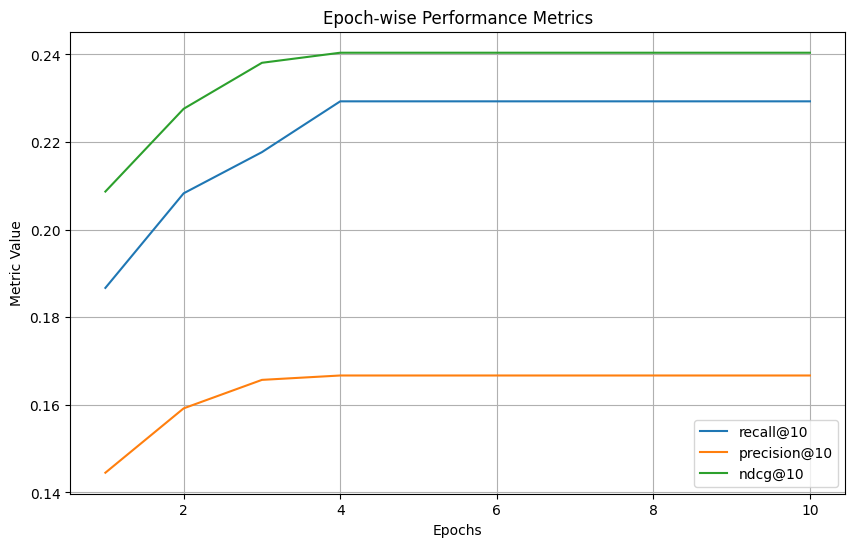

In [ ]:
import time  # To track start, end, and total run time
from recbole.config import Config
from recbole.data.utils import create_dataset, data_preparation
from recbole.model.general_recommender import BPR
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger
import os
import matplotlib.pyplot as plt  # For plotting metrics

import warnings
warnings.filterwarnings('ignore')

# Step 1: Define the configuration dictionary
config_dict = {
    'model': 'BPR',  # The model to train (you can replace with other models like NCF, SASRec, etc.)
    'dataset': 'ml-100k',  # Dataset to use (MovieLens 100K)
    'data_path': 'dataset/',  # Default data path
    'epochs': 10,  # Number of training epochs
    'train_batch_size': 512,  # Batch size during training
    'eval_batch_size': 512,  # Batch size during evaluation
    'train_neg_sample_args': {'uniform': 1},  # Updated parameter for negative sampling
    'learning_rate': 0.001,  # Learning rate
    'topk': [5, 10],  # Evaluate top-k results (e.g., Precision@5, Precision@10)
    'metrics': ['Recall', 'Precision', 'NDCG'],  # Metrics to evaluate
    'valid_metric': 'recall@10',  # Validation metric to select the best model
    'log_level': 'none',  # Disable logging for simplicity
    'checkpoint_dir': './saved_models/'  # Directory to save the best model
}

# Capture the start time
start_time = time.time()

# Step 2: Initialize the configuration object
config = Config(model='BPR', dataset='ml-100k', config_dict=config_dict)

# Step 3: Initialize the seed for reproducibility and logger
init_seed(42, True)
init_logger(config)

# Step 4: Load the dataset and prepare data for training
dataset = create_dataset(config)  # Automatically download the dataset if not available
train_data, valid_data, test_data = data_preparation(config, dataset)  # Split the data into train/valid/test

# Step 5: Initialize the model (BPR in this case)
model = BPR(config, train_data.dataset).to(config['device'])  # Load the BPR model

# Step 6: Initialize the trainer and collect metrics after each epoch
trainer = Trainer(config, model)  # Trainer handles the training loop

# Lists to store epoch-wise metrics
epochs = []
recall_at_10 = []
precision_at_10 = []
ndcg_at_10 = []

# Use the fit method for training
for epoch in range(config['epochs']):
    print(f"Epoch {epoch + 1} / {config['epochs']}")

    # Fit the model for one epoch
    best_valid_score, valid_result = trainer.fit(train_data, valid_data)

    # Print valid_result keys for debugging purposes
    print(f"Validation results for epoch {epoch + 1}: {valid_result.keys()}")

    # Store the metrics for this epoch using lowercase metric names
    if 'recall@10' in valid_result:
        recall_at_10.append(valid_result['recall@10'])
    else:
        print(f"recall@10 not found in validation results for epoch {epoch + 1}")

    if 'precision@10' in valid_result:
        precision_at_10.append(valid_result['precision@10'])
    else:
        print(f"precision@10 not found in validation results for epoch {epoch + 1}")

    if 'ndcg@10' in valid_result:
        ndcg_at_10.append(valid_result['ndcg@10'])
    else:
        print(f"ndcg@10 not found in validation results for epoch {epoch + 1}")

    # Append epoch number if all metrics are added
    if len(recall_at_10) == len(precision_at_10) == len(ndcg_at_10):
        epochs.append(epoch + 1)

    print(f"Epoch {epoch + 1}: recall@10={recall_at_10[-1] if recall_at_10 else 'N/A'}, precision@10={precision_at_10[-1] if precision_at_10 else 'N/A'}, ndcg@10={ndcg_at_10[-1] if ndcg_at_10 else 'N/A'}")

# Step 7: Manually load the best model
# Define the path to the saved model checkpoint (based on checkpoint_dir in config)
best_model_path = os.path.join(config['checkpoint_dir'], config['model'] + '.pth')

# Check if the best model exists
if os.path.exists(best_model_path):
    model.load_state_dict(trainer.load_checkpoint(best_model_path))  # Load the best model
else:
    print("Best model not found, proceeding with the current model.")

# Step 8: Evaluate the model using the Trainer's built-in test evaluation
test_result = trainer.evaluate(test_data)  # Let the Trainer evaluate the model

# Capture the end time
end_time = time.time()

# Step 9: Print the results
print("Test results:", test_result)
print("Interpretation: The model was able to retrieve recall@10 of the relevant items in its top 10 recommendations for each user in the test set.")

# Calculate and print total run time
total_time = end_time - start_time
print(f"Start time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
print(f"End time: {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))}")
print(f"Total run time: {total_time:.2f} seconds")

# Step 10: Plot the metrics (if available)
if recall_at_10 and precision_at_10 and ndcg_at_10:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, recall_at_10, label='recall@10')
    plt.plot(epochs, precision_at_10, label='precision@10')
    plt.plot(epochs, ndcg_at_10, label='ndcg@10')
    plt.xlabel('Epochs')
    plt.ylabel('Metric Value')
    plt.title('Epoch-wise Performance Metrics')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Metrics not available for plotting.")


References:
1. https://recbole.io/docs/user_guide/model/general/bpr.html

**Model 2:  Amazon Books**

In [ ]:
# Import required modules
from recbole.quick_start import run_recbole
from recbole.config import Config
from recbole.utils import init_logger

# Step 1: Define the configuration
config_dict = {
    'model': 'GRU4Rec',               # Model type (xLSTM-based model)
    'dataset': 'amazon-book',          # Amazon Books dataset
    'epochs': 10,                      # Number of training epochs
    'train_batch_size': 256,           # Batch size for training
    'embedding_size': 64,              # Size of embeddings for items/users
    'hidden_size': 64,                 # Size of the LSTM hidden layer
    'learning_rate': 0.001,            # Learning rate
    'loss_type': 'BPR',                # Bayesian Personalized Ranking loss
    'eval_args': {'split': {'RS': [0.8, 0.1, 0.1]}, 'order': 'TO', 'mode': 'full'}, # Evaluation split
    'topk': 10,                        # Top-k items for evaluation
    'train_neg_sample_args': {'distribution': 'uniform', 'sample_num': 1},  # Negative sampling
    'MAX_ITEM_LIST_LENGTH': 50,        # Maximum sequence length for users
    'metrics': ['Recall', 'MRR', 'NDCG']  # Evaluation metrics
}

# Step 2: Initialize the configuration and logger
config = Config(model='GRU4Rec', dataset='amazon-book', config_dict=config_dict)
init_logger(config)

# Step 3: Run RecBole (automatically handles training, validation, and testing)
run_recbole(config=config)


**Model 3: SVD Calculation for our example**

In [2]:
import numpy as np

# Define the matrix based on the input
M = np.array([
    [1, 1, 1, 1, 1, 0, 0, 0, 0],  # User (Horse Buyer)
    [1, 1, 1, 0, 1, 0, 0, 0, 0],  # Friend A
    [0, 0, 0, 0, 1, 1, 0, 1, 0],  # Friend B
    [0, 0, 0, 0, 0, 0, 1, 0, 1],  # Friend C
])

# Perform SVD
U, Sigma, Vt = np.linalg.svd(M, full_matrices=False)

# Print the components
print("U matrix (users in latent space):")
display(U)
print("\nSigma matrix (singular values):")
display(Sigma)
print("\nV^T matrix (hobbies in latent space):")
display(Vt)

# To reduce dimensionality, keep only the top k singular values
k = 2  # Example: reduce to 2 dimensions
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the matrix with reduced dimensions
M_approx = np.dot(U_k, np.dot(Sigma_k, Vt_k))

print("\nReconstructed matrix (approximation):")
display(M_approx)

U matrix (users in latent space):


array([[-0.72727885,  0.20095595,  0.        ,  0.65626381],
       [-0.64529083,  0.12552074,  0.        , -0.75355444],
       [-0.23380597, -0.97152522,  0.        ,  0.03838645],
       [ 0.        ,  0.        ,  1.        ,  0.        ]])


Sigma matrix (singular values):


array([2.97834689, 1.63216252, 1.41421356, 0.68227218])


V^T matrix (hobbies in latent space):


array([[-0.4608495 , -0.4608495 , -0.4608495 , -0.24418876, -0.53935143,
        -0.07850193,  0.        , -0.07850193,  0.        ],
       [ 0.20002707,  0.20002707,  0.20002707,  0.12312251, -0.39521097,
        -0.59523804,  0.        , -0.59523804,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.70710678,  0.        ,  0.70710678],
       [-0.14259797, -0.14259797, -0.14259797,  0.96187977, -0.08633531,
         0.05626266,  0.        ,  0.05626266,  0.        ]])


Reconstructed matrix (approximation):


array([[ 1.06384832,  1.06384832,  1.06384832,  0.56931781,  1.03865668,
        -0.02519164,  0.        , -0.02519164,  0.        ],
       [ 0.92668621,  0.92668621,  0.92668621,  0.49453051,  0.95561249,
         0.02892628,  0.        ,  0.02892628,  0.        ],
       [ 0.00373464,  0.00373464,  0.00373464, -0.02519164,  1.00226112,
         0.99852648,  0.        ,  0.99852648,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [4]:
import numpy as np

# Define the matrix based on the input
M = np.array([
    [1, 1, 1, 1, 1, 0, 0, 0, 0],  # User (Horse Buyer)
    [1, 1, 1, 0, 1, 0, 0, 0, 0],  # Friend A
    [0, 0, 0, 0, 1, 1, 0, 1, 0],  # Friend B
    [0, 0, 0, 0, 0, 0, 1, 0, 1],  # Friend C
])

# Perform SVD
U, Sigma, Vt = np.linalg.svd(M, full_matrices=False)

# Helper function to format matrices with 2 decimal places and single-line rows
def print_matrix(name, matrix):
    print(f"\n{name}:")
    for row in matrix:
        print("  [" + " ".join(f"{val:6.2f}" for val in row) + "]")

# Convert Sigma to diagonal matrix for better clarity
Sigma_diag = np.diag(Sigma)

# Prepare reduced matrices for k = 2
k = 2  # Use only top 2 singular values
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
Vt_k = Vt[:k, :]

# Reconstruct the matrix with reduced dimensions
M_approx = np.dot(U_k, np.dot(Sigma_k, Vt_k))

# Print matrices in a readable format
print_matrix("U matrix (users in latent space)", U)
print_matrix("Sigma matrix (singular values)", Sigma_diag)
print_matrix("V^T matrix (hobbies in latent space)", Vt)
print_matrix("Reconstructed matrix (approximation)", M_approx)


U matrix (users in latent space):
  [ -0.73   0.20   0.00   0.66]
  [ -0.65   0.13   0.00  -0.75]
  [ -0.23  -0.97   0.00   0.04]
  [  0.00   0.00   1.00   0.00]

Sigma matrix (singular values):
  [  2.98   0.00   0.00   0.00]
  [  0.00   1.63   0.00   0.00]
  [  0.00   0.00   1.41   0.00]
  [  0.00   0.00   0.00   0.68]

V^T matrix (hobbies in latent space):
  [ -0.46  -0.46  -0.46  -0.24  -0.54  -0.08   0.00  -0.08   0.00]
  [  0.20   0.20   0.20   0.12  -0.40  -0.60   0.00  -0.60   0.00]
  [  0.00   0.00   0.00   0.00   0.00   0.00   0.71   0.00   0.71]
  [ -0.14  -0.14  -0.14   0.96  -0.09   0.06   0.00   0.06   0.00]

Reconstructed matrix (approximation):
  [  1.06   1.06   1.06   0.57   1.04  -0.03   0.00  -0.03   0.00]
  [  0.93   0.93   0.93   0.49   0.96   0.03   0.00   0.03   0.00]
  [  0.00   0.00   0.00  -0.03   1.00   1.00   0.00   1.00   0.00]
  [  0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00]


In [ ]:
!pip install recbole
!pip install ray
!pip install kmeans_pytorch
import recbole.model.sequential_recommender as seq_recommenders
print(dir(seq_recommenders))
